In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Age + Date_of_birth
Date_of_birth obsahuje formáty:<br>
YYYY-MM-DD 00 00 00<br>
DD-MM-YYYY  0:00:00<br>
DD-MM-YYYY (Obsahuje chyby - dôkazom toho je hneď prvý záznam s 02-10-2029, dalo by sa to opraviť na 1929 a tak by to korešpondovalo s rokmi, no pandas nevie prečítať posledné 2 čísla YY)<br>
Z nasledujúceho výstupu je možné odhadnúť treshold na základe ktorého by sa dalo nájsť storočie pre každý rok (ak ich všetky majú na rovnako). 

Age obsahuje jeden záznam s rokmi 455, aj keď korešponduje s dátumom narodenia, zahodíme ho lebo aj tak ním nestratíme veľa info pri klasifikácii.

In [10]:
train['date_of_birth'] = train['date_of_birth'].str.extract('(\d*-\d\d-\d\d)', expand=True)
train.drop(train[train['age'] > 120].index, inplace=True)
train['date_of_birth'] = pd.to_datetime(train['date_of_birth'])
train['date_of_birth'] = train['date_of_birth'].dt.strftime('%d-%m-%y')
train[(train['age'] < 20)][112:116][['age', 'date_of_birth']]


age date_of_birth
2421  18.0      18-12-99
2444  18.0      06-02-00
2445  18.0      14-09-99
2504  19.0      13-03-99

In [11]:
train['age'] = train['age'].fillna(train['age'].median())

In [12]:
train['sex'].value_counts()

F    1829
M     860
?     110
Name: sex, dtype: int64

In [22]:
def returnMedian(mystring):
    return mystring[(len(mystring)-1)/2]

#x = float(train['date_of_birth'].median() )
x = returnMedian(train['date_of_birth'])
print(x)

14-01-62


In [25]:
train.loc[(train['date_of_birth']=='NaT' ), 'date_of_birth' ]=  x

In [26]:
train['personal_info'].head()

0    White|United-States\nSome-college -- Never-mar...
1    White|United-States\nHS-grad -- Never-married|...
2    White|United-States\nBachelors -- Divorced|Not...
3    White|United-States\nBachelors -- Never-marrie...
4    White|United-States\nHS-grad -- Never-married|...
Name: personal_info, dtype: object

# There are important and related information to almost all of the colums in personal- info Column



In [27]:
train.loc[(train['date_of_birth']=='NaT' )]

Empty DataFrame
Columns: [Unnamed: 0, age, sex, on thyroxine, query on thyroxine, on antithyroid medication, sick, pregnant, thyroid surgery, I131 treatment, query hypothyroid, query hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH measured, TSH, T3 measured, T3, TT4 measured, TT4, T4U measured, T4U, FTI measured, FTI, TBG measured, TBG, referral source, class, workclass, fnlwgt, education-num, occupation, capital-gain, capital-loss, hours-per-week, date_of_birth, personal_info]
Index: []

[0 rows x 40 columns]

We can devide personal_info atribute into 5 individual atributes


In [28]:
pom = None
pom = train['personal_info'].str.split('[|]', 1, expand=True) 
              # rename(columns={0:'class', 1:'class number'})
#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['personal_info'], inplace=True)
train['race'] = pom[0]
train['personal_info'] = pom[1]
train['personal_info'] = train['personal_info'].astype(str) 

pom1 = test['personal_info'].str.split('[|]', 1, expand=True)  
test.drop(columns=['personal_info'], inplace=True) 
test['race'] = pom1[0]
test['personal_info'] = pom1[1]
test['personal_info'] = test['personal_info'].astype(str)




In [29]:
train['personal_info'].head()

0    United-States\nSome-college -- Never-married|O...
1    United-States\nHS-grad -- Never-married|Own-child
2    United-States\nBachelors -- Divorced|Not-in-fa...
3    United-States\nBachelors -- Never-married|Own-...
4    United-States\nHS-grad -- Never-married|Not-in...
Name: personal_info, dtype: object

In [30]:
pom = train['personal_info'].str.split('\n', 1, expand=True)   # rename(columns={0:'class', 1:'class number'})

#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['personal_info'], inplace=True)
train['Country'] = pom[0]
train['personal_info2'] = pom[1]     
train['personal_info2'] = train['personal_info2'].astype(str) 

pom1 = test['personal_info'].str.split('\n', 1, expand=True)
test.drop(columns=['personal_info'], inplace=True)
test['Country'] = pom1[0]
test['personal_info2'] = pom1[1]
test['personal_info2'] = test['personal_info2'].astype(str) 

In [31]:
train['personal_info2'].head()

0    Some-college -- Never-married|Own-child
1         HS-grad -- Never-married|Own-child
2        Bachelors -- Divorced|Not-in-family
3       Bachelors -- Never-married|Own-child
4     HS-grad -- Never-married|Not-in-family
Name: personal_info2, dtype: object

In [32]:
pom = train['personal_info2'].str.split('--', 1, expand=True)   # rename(columns={0:'class', 1:'class number'})

#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['personal_info2'], inplace=True)
train['education-status'] = pom[0]
train['personal_info3'] = pom[1]
train['personal_info3'] = train['personal_info3'].astype(str) 



pom1 = test['personal_info2'].str.split('--', 1, expand=True)

test.drop(columns=['personal_info2'], inplace=True)
test['education-status'] = pom1[0]
test['personal_info3'] = pom1[1]
test['personal_info3'] = test['personal_info3'].astype(str) 

In [33]:
train['personal_info3'].head()

0         Never-married|Own-child
1         Never-married|Own-child
2          Divorced|Not-in-family
3         Never-married|Own-child
4     Never-married|Not-in-family
Name: personal_info3, dtype: object

In [34]:
pom = train['personal_info3'].str.split('[|]', 1, expand=True)   # rename(columns={0:'class', 1:'class number'})

#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['personal_info3'], inplace=True)

train['marital-status'] = pom[0]
train['personal_info'] = pom[1]
train['personal_info'] = train['personal_info'].astype(str) 



pom1 = test['personal_info3'].str.split('[|]', 1, expand=True) 
test.drop(columns=['personal_info3'], inplace=True)
test['marital-status'] = pom1[0]
test['personal_info'] = pom1[1]
test['personal_info'] = test['personal_info'].astype(str) 

In [35]:
train['personal_info'].head()

0        Own-child
1        Own-child
2    Not-in-family
3        Own-child
4    Not-in-family
Name: personal_info, dtype: object

In [36]:
train['class'].head()


0    negative.|3734
1    negative.|3516
2    negative.|2331
3    negative._2960
4    negative._3424
Name: class, dtype: object

In [37]:
test['class'].head()

0    negative._2746
1    negative.|1391
2    negative.|2764
3    negative.|2157
4     negative.|433
Name: class, dtype: object

# class + class number
rozdelenie atribútu class na 2

In [38]:
pom = train['class'].str.split('.[|_]', 1, expand=True)   # rename(columns={0:'class', 1:'class number'})
#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
train.drop(columns=['class'], inplace=True)
train['class'] = pom[0]
train['class number'] = pom[1]
train['class number'] = train['class number'].astype(int) 
train['class number'].describe()




count    2799.000000
mean     1895.972847
std      1091.149836
min         1.000000
25%       957.000000
50%      1914.000000
75%      2838.000000
max      3772.000000
Name: class number, dtype: float64

In [39]:
#train.to_csv('repaired.csv')

In [40]:
pom = test['class'].str.split('.[|_]', 1, expand=True)   # rename(columns={0:'class', 1:'class number'})
#train.merge(pom, on='class', how='right')      # why isnt this working???!!!!
test.drop(columns=['class'], inplace=True)
test['class'] = pom[0]
test['class number'] = pom[1]
test['class number'] = test['class number'].astype(int) 
test['class number'].describe()

count     972.000000
mean     1860.276749
std      1083.076925
min        21.000000
25%       901.500000
50%      1812.500000
75%      2802.000000
max      3770.000000
Name: class number, dtype: float64

Now we have devided the personal_info atribute into 5 atributes and class in to class and class number so that we can use furhter for preprocessing and cleaning data


In [41]:
class Abc(TransformerMixin):
    def __init__(self, column, source, target):
        self.column = column
        self.source = source
        self.target = target
        
    def fit(self, df, y=None, **fit_params):
        return self
    
    def transform(self, df, **transform_params):
        sample = df[self.column] == self.source
        df.loc[sample, self.column] = self.target
        return df

# On thyroxin

In [42]:
train['on thyroxine'].value_counts()

f        2216
t         303
F         131
FALSE     122
TRUE       16
T          11
Name: on thyroxine, dtype: int64

In [43]:
test['on thyroxine'].value_counts()

f        753
t        122
F         43
FALSE     42
T          6
TRUE       6
Name: on thyroxine, dtype: int64

The problem with On thyroxin is disorganisation of the data so we can organise them by the previously defined Abc function

In [44]:
ppl = Pipeline([
               ('a', Abc('on thyroxine', 'TRUE', 't')),
                    ('ab', Abc('on thyroxine', 'FALSE', 'f')),
                    ('abc', Abc('on thyroxine', 'T', 't')),
                    ('abcd', Abc('on thyroxine', 'F', 'f'))
                
               ])

model = ppl.fit(train)
train_t = model.transform(train)
##test_t = model.transform(test)

In [45]:
ppl = Pipeline([
               ('a', Abc('on thyroxine', 'TRUE', 't')),
                    ('ab', Abc('on thyroxine', 'FALSE', 'f')),
                    ('abc', Abc('on thyroxine', 'T', 't')),
                    ('abcd', Abc('on thyroxine', 'F', 'f'))
                
               ])

model = ppl.fit(test)
test_t = model.transform(test)

In [46]:
test['on thyroxine'].value_counts()

f    838
t    134
Name: on thyroxine, dtype: int64

In [47]:
train['sex'].value_counts()

F    1829
M     860
?     110
Name: sex, dtype: int64

The problem with sex atribute is missing values which we analysed in the expoClass and can change their values 
according to the relations we found with other entities

In [48]:
train.loc[(train['sex']=='?' )  & (train['pregnant']== 't'  ), 'sex'] = 'F'
test.loc[(test['sex']=='?' )  & (test['pregnant']== 't'  ), 'sex'] = 'F'

In [49]:
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Unmarried'  ), 'sex'] = 'F'
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Not-in-family'  ), 'sex'] = 'F'
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Husband'  ), 'sex'] = 'M'
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Wife'  ), 'sex'] = 'F'
train.loc[(train['sex']=='F' )  & (train['personal_info']== 'Husband'  ), 'sex'] = 'M'
train.loc[(train['sex']=='?' )  & (train['personal_info']== 'Own-child'  ), 'sex'] = 'M'


test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Unmarried'  ), 'sex'] = 'F'
test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Not-in-family'  ), 'sex'] = 'F'
test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Husband'  ), 'sex'] = 'M'
test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Wife'  ), 'sex'] = 'F'
test.loc[(test['sex']=='F' )  & (test['personal_info']== 'Husband'  ), 'sex'] = 'M'
test.loc[(test['sex']=='?' )  & (test['personal_info']== 'Own-child'  ), 'sex'] = 'M'

there is a relation between sex and occupation

In [50]:
train.loc[(train['sex']=='?' )  & (train['occupation']== ' Craft-repair'  ), 'sex'] = 'M'

test.loc[(train['sex']=='?' )  & (test['occupation']== ' Craft-repair'  ), 'sex'] = 'M'

In [51]:
train.sex.value_counts()

F    1871
M     928
Name: sex, dtype: int64

In [52]:
#train.to_csv('repaired.csv')
test.sex.value_counts()

F    664
M    308
Name: sex, dtype: int64

# referral source
Disorganised data

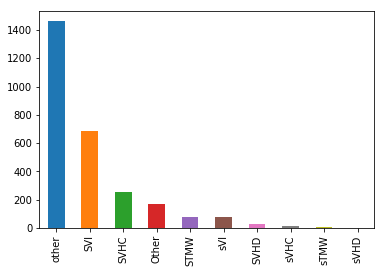

In [53]:
train['referral source'].value_counts().plot.bar();

In [54]:
train['referral source'].value_counts()

other    1463
SVI       689
SVHC      257
Other     169
STMW       81
sVI        81
SVHD       29
sVHC       18
sTMW       10
sVHD        2
Name: referral source, dtype: int64

The Data in this atribute is dis-organised so we can simply organise by combining like data to avoid case sensitivity

In [55]:
train.loc[(train['referral source']=='sVHC'), 'referral source'] = 'SVHC'
train.loc[(train['referral source']=='sVHD'), 'referral source'] = 'SVHD'
train.loc[(train['referral source']=='sVI'), 'referral source'] = 'SVI'
train.loc[(train['referral source']=='sTMW'), 'referral source'] = 'STMW'
train.loc[(train['referral source']=='Other'), 'referral source'] = 'other'


In [56]:
test.loc[(test['referral source']=='sVHC'), 'referral source'] = 'SVHC'
test.loc[(test['referral source']=='sVHD'), 'referral source'] = 'SVHD'
test.loc[(test['referral source']=='sVI'), 'referral source'] = 'SVI'
test.loc[(test['referral source']=='sTMW'), 'referral source'] = 'STMW'
test.loc[(test['referral source']=='Other'), 'referral source'] = 'other'

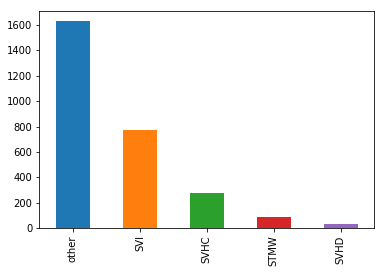

In [57]:
train['referral source'].value_counts().plot.bar();

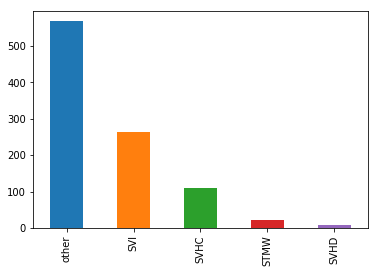

In [58]:
test['referral source'].value_counts().plot.bar();

In [59]:
train['referral source'].value_counts()

other    1632
SVI       770
SVHC      275
STMW       91
SVHD       31
Name: referral source, dtype: int64

# query - hypop (OK)

# TSH, TSH measured (OK)
Obsahuje nevyplnené hodnoty, ktoré vyplníme mediánom. Outliery majú vysoké hodnoty ktoré je treba vyvážiť s ostatnými hodnotami. Kedže obsahuje hodnoty menšie ako 1, namiesto použitia logaritmu použijeme odmocninu.

### Stará distribúcia

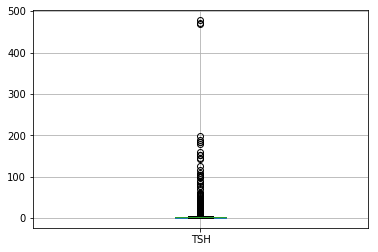

In [60]:
train.boxplot(column='TSH')         # filtrovany boxplot

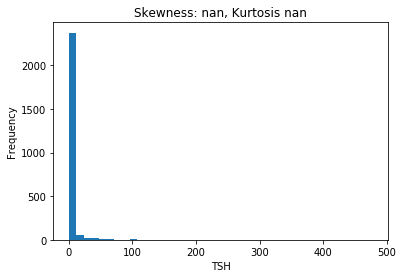

In [61]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['TSH']), (stats.kurtosis(train['TSH']))))
plt.xlabel('TSH')
train.TSH.plot(kind='hist', bins = 40)

### Transformácia distribúcie

In [62]:
print(train['TSH'].head())
train['TSH'].fillna(value=train['TSH'].median(), inplace=True)
train['TSH'] = train['TSH'].apply(lambda x: math.sqrt(x))
print(train['TSH'].head())

0    13.00
1      NaN
2     2.00
3     2.70
4     0.92
Name: TSH, dtype: float64
0    3.605551
1    1.183216
2    1.414214
3    1.643168
4    0.959166
Name: TSH, dtype: float64


In [63]:
print(test['TSH'].head())
test['TSH'].fillna(value=test['TSH'].median(), inplace=True)
test['TSH'] = test['TSH'].apply(lambda x: math.sqrt(x))
print(test['TSH'].head())

0     NaN
1    27.0
2     1.1
3     8.5
4     1.3
Name: TSH, dtype: float64
0    1.140175
1    5.196152
2    1.048809
3    2.915476
4    1.140175
Name: TSH, dtype: float64


### Nová distribúcia

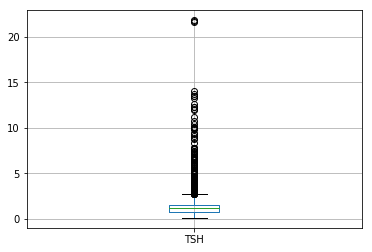

In [64]:
train.boxplot(column='TSH')

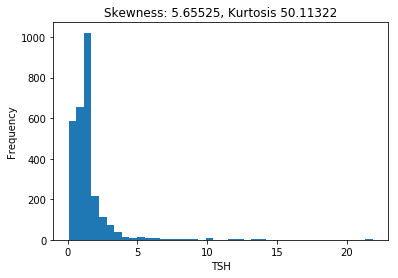

In [65]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['TSH']), (stats.kurtosis(train['TSH']))))
plt.xlabel('TSH')
train.TSH.plot(kind='hist', bins = 40)

# FTI
Pretypujeme typ object na float. Chýbajúce otáznikové hodnoty nahradíme mediánom.

In [66]:
train.loc[train['FTI'] == '?', 'FTI'] = -1
train['FTI'] = train['FTI'].astype(float) 
print('Pocet outlierov:', train[(train['FTI'] == -1)].count().iloc[0])
pom = train[(train['FTI'] > -1)]
print('Median:', pom['FTI'].median())
train.loc[train['FTI'] == -1, 'FTI'] = pom['FTI'].median()

Pocet outlierov: 295
Median: 107.0


In [67]:
test.loc[test['FTI'] == '?', 'FTI'] = -1
test['FTI'] = test['FTI'].astype(float) 
print('Pocet outlierov:', test[(test['FTI'] == -1)].count().iloc[0])
pom = test[(test['FTI'] > -1)]
print('Median:', pom['FTI'].median())
test.loc[test['FTI'] == -1, 'FTI'] = pom['FTI'].median()

Pocet outlierov: 90
Median: 106.0


### Distribúcia

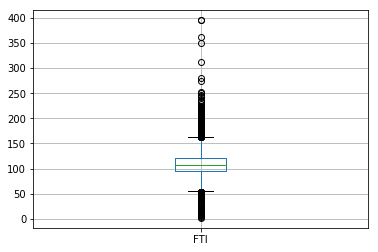

In [68]:
train.boxplot(column='FTI')

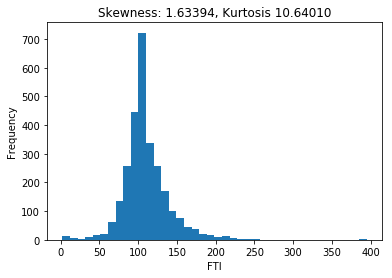

In [69]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['FTI']), (stats.kurtosis(train['FTI']))))
plt.xlabel('FTI')
train.FTI.plot(kind='hist', bins = 40)

# TBG

Pozostáva len z otáznikov, tento atribút môžeme zahodiť.

In [70]:
train.drop(columns=['TBG'], inplace=True)
train.drop(columns=['TBG measured'], inplace=True)

In [71]:
test.drop(columns=['TBG'], inplace=True)
test.drop(columns=['TBG measured'], inplace=True)

# fnlwgt
V nasledujúcich dvoch obrázkoch je vidiet veľká vychýlenosť hodnôt

### Stará distribúcia

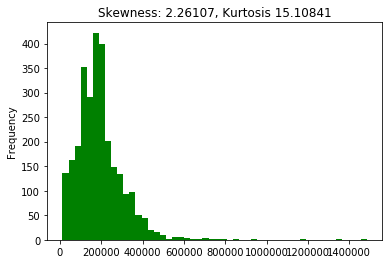

In [72]:
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['fnlwgt']), (stats.kurtosis(train['fnlwgt']))))
train.fnlwgt.plot(kind='hist', bins = 50, color="Green")

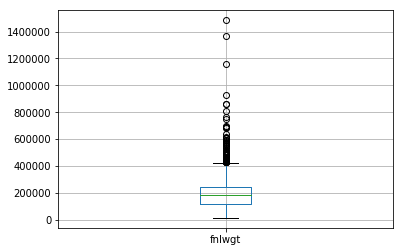

In [73]:
train.head()
train.boxplot(column='fnlwgt')

Outliery sú vo vysokách hodnotách. Na to, aby boli viac vyváženejšie s ostatnými, aplikujeme funkciu logaritmus.

### Nová distribúcia

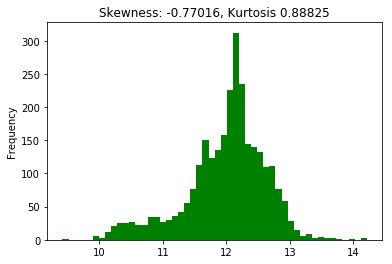

In [74]:
train['fnlwgt'] = train['fnlwgt'].apply(lambda x: math.log(x))    # aplikovanie funkcie logaritmus
plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['fnlwgt']), (stats.kurtosis(train['fnlwgt']))))
train.fnlwgt.plot(kind='hist', bins = 50, color="Green")

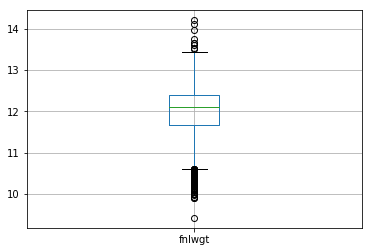

In [75]:
train.boxplot(column='fnlwgt')


# Psych
Problems : null and missing values

Changing data according to the relations found previously with other entities

In [76]:
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Wife'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Husband'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Own-child'  ), 'psych'] = 'f'

In [77]:
test.loc[(test['psych']=='??' )  & (test['personal_info']== 'Wife'  ), 'psych'] = 'f'
test.loc[(test['psych']=='??' )  & (test['personal_info']== 'Husband'  ), 'psych'] = 'f'
test.loc[(test['psych']=='??' )  & (test['personal_info']== 'Own-child'  ), 'psych'] = 'f'

In [78]:
train['psych'].value_counts()

f     2440
t      125
??      52
Name: psych, dtype: int64

In [79]:
test['psych'].value_counts()

f     847
t      44
??     21
Name: psych, dtype: int64

In [80]:
train.loc[(train['psych']=='??' )  & (train['marital-status']== ' Married-spouse-absent'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['marital-status']== ' Widowed'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['marital-status']== ' Never-married'  ), 'psych'] = 'f'

In [81]:
test.loc[(train['psych']=='??' )  & (train['marital-status']== ' Married-spouse-absent'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['marital-status']== ' Widowed'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['marital-status']== ' Never-married'  ), 'psych'] = 'f'

In [82]:
train['psych'].value_counts()

f     2469
t      125
??      23
Name: psych, dtype: int64

In [83]:
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Other-relative'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Unmarried'  ), 'psych'] = 'f'
train.loc[(train['psych']=='??' )  & (train['personal_info']== 'Not-in-family'  ), 'psych'] = 'f'

In [84]:
train['psych'].value_counts()

f    2492
t     125
Name: psych, dtype: int64

This column is resolved

filling the missing data with median of the enitity

In [132]:
train["psych"] = train["psych"].fillna(train["psych"].mode())
train["psych"].mode()                                             
                                           

0    f
dtype: object

In [86]:
train['psych'].isnull().sum()


182

In [87]:
train['psych'] = train['psych'].fillna('f')

In [88]:
train.loc[(train['psych'].isnull())]

Empty DataFrame
Columns: [Unnamed: 0, age, sex, on thyroxine, query on thyroxine, on antithyroid medication, sick, pregnant, thyroid surgery, I131 treatment, query hypothyroid, query hyperthyroid, lithium, goitre, tumor, hypopituitary, psych, TSH measured, TSH, T3 measured, T3, TT4 measured, TT4, T4U measured, T4U, FTI measured, FTI, referral source, workclass, fnlwgt, education-num, occupation, capital-gain, capital-loss, hours-per-week, date_of_birth, race, Country, education-status, marital-status, personal_info, class, class number]
Index: []

[0 rows x 43 columns]

In [89]:
train['psych'].value_counts()

f    2674
t     125
Name: psych, dtype: int64

filling the remaining data with mode of the row

# education-num
Obsahuje vychýlene hodnoty, ktoré stačí vydeliť číslom 100, v prípade záporného čísla číslom -100 a pretypovať typ float na integer.

### Nová distribúcia

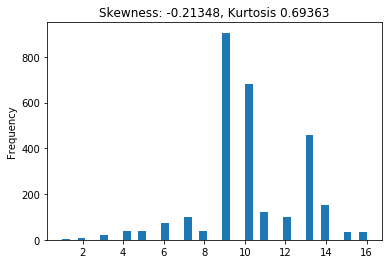

In [90]:
train.loc[train['education-num'] < 0, 'education-num'] /= -100
train.loc[train['education-num'] > 99, 'education-num'] /= 100
train['education-num'] = train['education-num'].astype(int) 

plt.title("Skewness: %.5f, Kurtosis %.5f" % (stats.skew(train['education-num']), (stats.kurtosis(train['education-num']))))
train['education-num'].plot(kind='hist', bins = 40)

# capital-gain
- nevyplnene hodnoty nahradime medianom (najcastejsou hodnotou 0)
- transformácia 12 outlierov taktiez medianom z intervalu hodnôt 10000 až 99998

In [137]:
print(train['capital-gain'].isnull().sum())
train["capital-gain"] = train["capital-gain"].fillna(train["capital-gain"].mode())
train['capital-gain'].isnull().sum()
train["capital-gain"].mode()

0


0    0.0
dtype: float64

In [138]:
train["capital-gain"].head(30) 
train['psych'].head(30)

0     f
1     f
2     f
3     f
4     f
5     f
6     f
7     f
8     f
9     f
10    t
11    f
12    f
13    f
14    f
15    f
16    f
17    f
18    f
19    f
20    f
21    f
22    f
23    f
24    f
25    f
26    f
27    f
28    f
29    f
Name: psych, dtype: object

In [139]:
train['capital-gain'].describe()   # vacsina hodnot 0

count     2799.000000
mean       475.547338
std       2276.207428
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      27828.000000
Name: capital-gain, dtype: float64

In [172]:
train.loc[train['education-num'] < 0, 'education-num'] /= -100
train.loc[train['education-num'] > 99, 'education-num'] /= 100
train['education-num'] = train['education-num'].astype(int) 


print('Pocet outlierov:', train[(train['capital-gain'] == 99999)].count().iloc[0])   # počet outlierov
pom = train[(train['capital-gain'] > 10000) & (train['capital-gain'] != 99999)]
print('Median:', pom['capital-gain'].median())                              # median
train.loc[train['capital-gain'] == 99999, 'capital-gain'] = pom['capital-gain'].median()

Pocet outlierov: 0
Median: 15024.0


In [171]:
train['capital-gain'].isnull().sum()

0

# T3 T3 measured

problem: nan-values

Histograms to show us the distribution of the data with it's category inorder to find the best alternative for clearing or filling the data, which shows that mean can be the value which we can fill the missing values

# Before

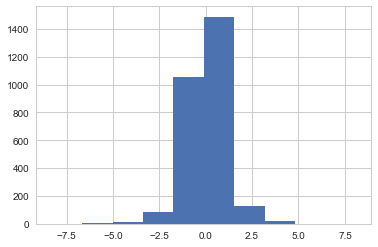

In [141]:
train["T3"].diff().hist()

In [142]:
train["T3"] = train["T3"].fillna(train["T3"].mean())
train["T3"].isnull().sum()

0

# After 

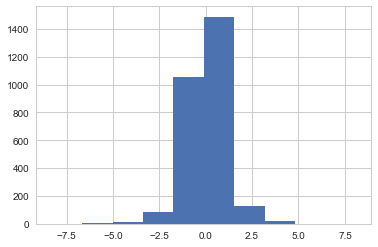

In [143]:
train["T3"].diff().hist()

# TT4 and T4


Problem: null vlaues

From the following histogram we can see that median can be suitable for filling in the missing rows

In [144]:
train["TT4"].isnull().sum()

0

# Before

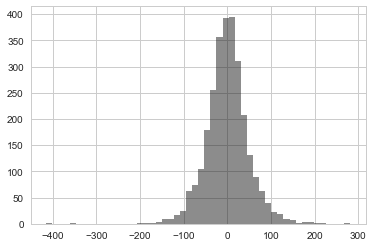

In [145]:
train["TT4"].diff().hist(color='k', alpha=0.5, bins=50)

# After

In [146]:
train["TT4"] = train["TT4"].fillna(train["TT4"].median())




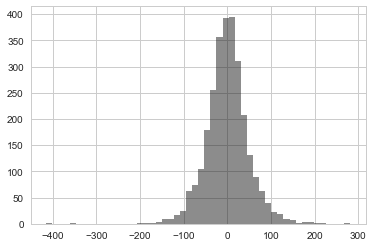

In [147]:
train["TT4"].diff().hist(color='k', alpha=0.5, bins=50)

In [148]:
train['TT4'].isnull().sum()

0



# T4U and T4U measured



Problems identified in the expoClass :  Missing values
Solution:  filling with median

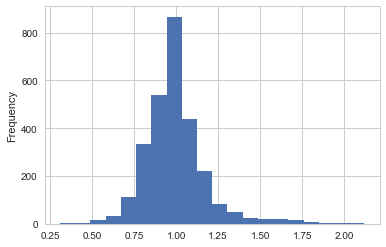

In [149]:
train["T4U"].plot.hist(stacked=True, bins=20)

In [150]:
train['T4U'].isnull().sum()

0

In [151]:
train["T4U"] = train["T4U"].fillna(train["T4U"].median())

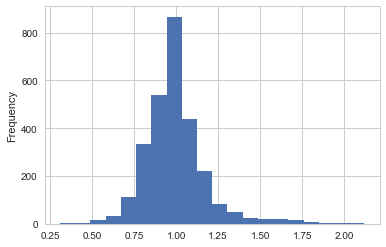

In [152]:
train["T4U"].plot.hist(stacked=True, bins=20)

# Workclass


Problems: wronng values
Solution: filling with the most used values in the entity

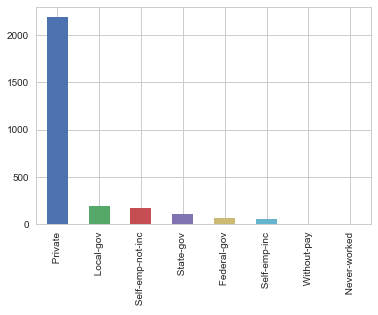

In [153]:
train['workclass'].value_counts().plot.bar();

In [154]:
train.loc[(train['workclass']==' ?' ) , 'workclass'] =  train["workclass"].mode()

In [109]:
train.loc[(train['workclass']==' ?' ) , 'workclass'] =  train["workclass"].mode()


In [110]:
train['workclass'] = train['workclass'].fillna('Private' )

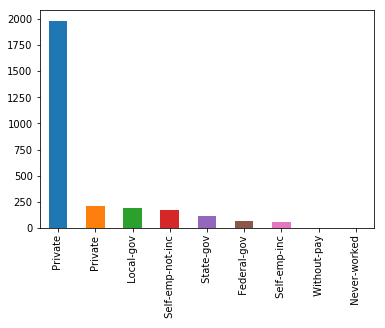

In [111]:
train['workclass'].value_counts().plot.bar();

In [155]:
train.loc[(train['workclass']=='Private' ) , 'workclass'] =  ' Private'
train["workclass"].value_counts()

 Private             2188
 Local-gov            195
 Self-emp-not-inc     171
 State-gov            113
 Federal-gov           69
 Self-emp-inc          60
 Without-pay            2
 Never-worked           1
Name: workclass, dtype: int64

In [156]:
train["workclass"].isnull().sum()

0



# Occupation class

Problems: Disorganised and wrong values
Solution: filling with mode and relations found in the expoClass

In [157]:
train.loc[(train['occupation']== ' ?'), 'occupation'] = train["occupation"].mode()
train.loc[(train['occupation']== ' Priv-house-serv'), 'occupation'] = 'Priv-house-serv'
train.loc[(train['occupation']== ' ?' ) & (train['class']== 'sick'),  'occupation'] = 'Priv-house-serv'


In [158]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

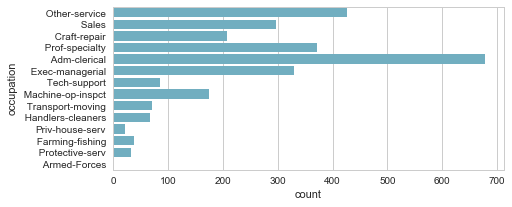

In [159]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="occupation", data=train, color="c");

In [160]:
train['occupation'] =  train['occupation'].fillna(train['occupation'].mode())

Country

In [161]:
train['occupation'].mode()
from collections import Counter
data = Counter(list(train['occupation'] ))
data.most_common()   # Returns all unique items and their counts
x = data.most_common(1)
lst2 = [item[0] for item in x]
y = str(lst2)

train['occupation'] =  train['occupation'].fillna(y)

train.loc[(train['occupation']== '[\' Adm-clerical\']' ),  'occupation'] = ' Adm-clerical'
train.loc[(train['occupation']== 'Adm-clerical' ),  'occupation'] = ' Adm-clerical'
train.loc[(train['occupation']== 'Priv-house-serv' ),  'occupation'] = ' Priv-house-serv'

In [162]:
train['occupation'].value_counts()

 Adm-clerical         678
 Other-service        426
 Prof-specialty       371
 Exec-managerial      330
 Sales                296
 Craft-repair         207
 Machine-op-inspct    174
 Tech-support          85
 Transport-moving      71
 Handlers-cleaners     68
 Farming-fishing       38
 Protective-serv       32
 Priv-house-serv       22
 Armed-Forces           1
Name: occupation, dtype: int64

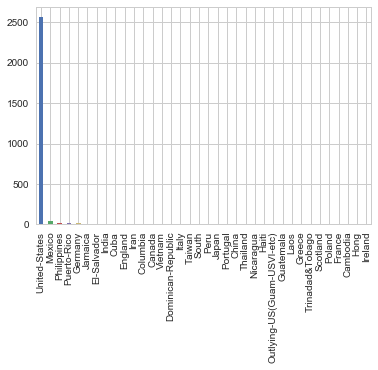

In [163]:
train['Country'].value_counts().plot.bar();

In [164]:
train.loc[(train['Country']== '?'), 'Country'] = train["Country"].mode()

In [165]:
train['Country'].isnull().sum()

0

In [167]:
data = Counter(list(train['Country'] ))
data.most_common()   # Returns all unique items and their counts
x = data.most_common(1)
lst2 = [item[0] for item in x]
y = str(lst2)
y = y.replace("[", "")
y = y.replace("]", "")
y = y.replace("'", "")


train['Country'] =  train['Country'].fillna(y)
y

'United-States'

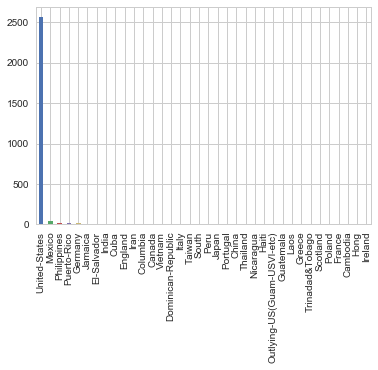

In [168]:
train['Country'].value_counts().plot.bar();

In [169]:
train['Country'].isnull().sum()

0

# Capital-loss (OK)

# hours per week
Neobsahuje chýbajúce hodnoty, má však vychýlené hodnoty 99 ktoré by sa mohli nahradiť najfrekventovanejšou hodnotou 40. (modusom).

In [170]:
train['hours-per-week'].describe()

count    2799.000000
mean       38.424795
std        12.016904
min         1.000000
25%        35.000000
50%        40.000000
75%        40.000000
max        94.000000
Name: hours-per-week, dtype: float64

In [127]:
train.loc[train['hours-per-week'] == 99, 'hours-per-week'] = train["hours-per-week"].mode()
train['hours-per-week'] = train['hours-per-week'].fillna(train['hours-per-week'].median())
train['hours-per-week'].describe()

count    2799.000000
mean       38.424795
std        12.016904
min         1.000000
25%        35.000000
50%        40.000000
75%        40.000000
max        94.000000
Name: hours-per-week, dtype: float64

In [128]:
test.sex.value_counts()
        

F    664
M    308
Name: sex, dtype: int64

Feature Standardisation
Label Encoding


In [129]:
train['workclass'].isnull().any()

False

In [130]:
train.isnull().sum()

Unnamed: 0                   0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
referral source              0
workclass                    0
fnlwgt                       0
education-num                0
occupation                   0
capital-

In [131]:
train.to_csv('repairedTrain.csv')